# <b> <center>FLY HIGH</center> </b>

<h2> Company Introduction </h2> <br>

Your client for this project is an Airline Company.<br>

Due to fierce competition in the airline industry, the airline company needs to focus on the passenger’s experience and satisfaction.
Customer feedback, in particular, is critical since it is an outcome measurement for business performance.
So, they need to analyze the data of passenger’s travel history.
One of the key measurements in this process is whether the passenger feels satisfied or not.

# Problem Statement :
The current process suffers from the following problems:

Analyzing the data of passengers manually and to understand whether a passenger is satisfied or not is a tedious task.
This process needs to be repeated every time they receive some feedback.

They want to automate the process of predicting the passenger satisfaction based on the travel history data collected by the airline company.

In [1]:
# Importing the important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import profile_report

In [39]:
# Scikit and preprocessing libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Dataset Description
<table>							
<th>	Column Name	</th>	<th>	Description	</th>		
<tr>	<td>	Id	</td>	<td>	Unique Id	</td>	</tr>
<tr>	<td>	Gender	</td>	<td>	Gender of the Passenger	</td>	</tr>
<tr>	<td>	Customer Type	</td>	<td>	If the customer is loyal or disloyal	</td>	</tr>
<tr>	<td>	Age	</td>	<td>	Age of the customer	</td>	</tr>
<tr>	<td>	Type of Travel	</td>	<td>	If the travel is for a business or a personal purpose	</td>	</tr>
<tr>	<td>	Class	</td>	<td>	Class of the aircraft in which the customer is travelling	</td>	</tr>
<tr>	<td>	Flight Distance	</td>	<td>	Distance covered by the flight	</td>	</tr>
<tr>	<td>	Inflight wifi service	</td>	<td>	If there is inflight wifi service or not	</td>	</tr>
<tr>	<td>	Departure/Arrival time convenient	</td>	<td>	Rating by the customer for Departure/Arrival Time	</td>	</tr>
<tr>	<td>	Ease of Online booking	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Gate location	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Food and drink	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Online boarding	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Seat comfort	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Inflight entertainment	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	On-board service	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Leg room service	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Baggage handling	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Checkin service	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Inflight service	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Cleanliness	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Departure Delay in Minutes	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	Arrival Delay in Minutes	</td>	<td>	Rating by the customer for this facility	</td>	</tr>
<tr>	<td>	satisfaction	</td>	<td>	If the passenger is satisfied or not	</td>	</tr>
</table>							


In [5]:
train_data = pd.read_csv('cust_train.csv')
print(train_data.shape)
train_data.head()

(83123, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,...,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,...,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,...,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,...,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,...,2,4,3,5,3,5,2,0,0.0,satisfied


In [6]:
test_data = pd.read_csv('cust_test.csv')
print(test_data.shape)
test_data.head()

(20781, 23)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,...,5,5,4,3,3,5,5,5,0,0.0
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,...,1,1,4,3,3,1,4,1,17,17.0
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,...,1,1,5,4,4,5,5,1,0,0.0
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,...,1,3,2,5,5,3,1,3,0,0.0
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,...,5,5,3,5,4,3,5,5,0,0.0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [8]:
train_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,82872.000000
mean,64971.539574,39.351106,1190.686753,2.732553,3.062269,2.756385,2.978057,3.205286,3.252842,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,14.714556,15.063121
std,37465.886717,15.099487,998.640016,1.329950,1.526983,1.401047,1.279064,1.330482,1.350905,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,38.108874,38.475487
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32552.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64864.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97430.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
#PR = train_data.profile_report(title='PR',progress_bar=False)
#PR.to_file('PR.html')

# Dataset Descriptions :

Dataset statistics

- Number of variables	24
- Number of observations	83123
- Missing cells	251

Variable types

- Numeric	18
- Categorical	6 <br>

<br>

- 1 - ID - Unique ID
- 2 - Gender - F - 50.7%, M- 49.3% 
- 3 - Cust Type - Loyal - 81.7%, Disloyal - 18.3%
- 4 -  Age - Almost Normally Distributed - Mean -49, Range - 78
- 5 - Type of Travel - Business - 69%, Personal - 31%
- 6 - Class -  Business - 47.7%, Eco- 45.1%,Ecoplus - 7.2%
- 7 - Flight Distance -  Median - 844, Mean -1190, Range - 4952 . Min - 31, seems to have some outlier
- 8 - Inflight Wifi Service - Median - 3. Mean - 2.7
- 9 - Departure arrival time - Median - 3 Mean - 3.06
- 10 - Ease of online Booking - Median - 3, Mean - 2.75
- 11 - Gate Location - Median -3 ,Mean- 2.97 
- 12 - Food and Drink - Median -3, Mean - 3.205
- 13 - Online Boarding - Median -3 ,Mean - 3.25
- 14 - Seat Comfort - Median -4 ,Mean - 3.44
- 15 - Inflight Entertainment - Median -4 ,Mean - 3.36
- 16- Onboard Service - Median -4 ,Mean - 3.38
- 17 - LegRoom Service -  Median - 4 , Mean - 3.35
- 19 - Checkin Service - Median - 3, Mean - 3.30
- 20 - Inflight Service - Median -4, Mean - 3.64
- 21 - Cleanliness - Median - 3, Mean - 3.29
- 22 - Departure in Delay in Minutes -Median -  0 , Mean  - 14
- 23 - Arrival Delay in Minutes - Median - 0, Mean - 105
- 24 - <b>Satisfaction </b>- Target Variable - Dissatisfied - 56.5%, Satisfied - 43.5%

In [11]:
train_data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<AxesSubplot:ylabel='Flight Distance'>

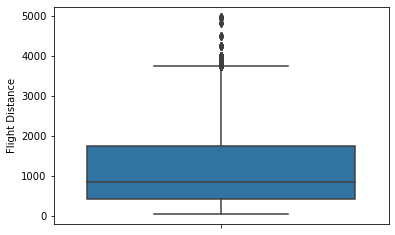

In [26]:
# Data Preprocessing - 

# 1 -  Handling Missing Values
train_data1 = train_data.copy()
train_data1['Arrival Delay in Minutes'].fillna(train_data1['Arrival Delay in Minutes'].median(),inplace=True)
train_data1.isnull().sum()

#2 - Handling Outliers - 

sns.boxplot(y=train_data1['Flight Distance']) # No Outliers as such can be seen on minimum Values|


In [19]:
#Converting the Categorical Variable to Numerical Variable

In [27]:
train_data1['satisfaction'].value_counts()

neutral or dissatisfied    47004
satisfied                  36119
Name: satisfaction, dtype: int64

In [31]:
train_data1['satisfaction'] = train_data1['satisfaction'].apply(lambda x :0 if x=='neutral or dissatisfied' else 1)

In [32]:
train_data1 = pd.get_dummies(train_data1.drop('id',axis=1),drop_first=True)

In [33]:
train_data1.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

<AxesSubplot:>

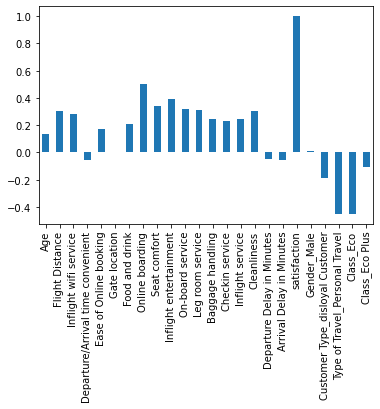

In [36]:
train_data1.corr()['satisfaction'].plot(kind='bar')

In [44]:
#Splitting the data into X and y
X=train_data1.drop('satisfaction',axis=1)
y=train_data1['satisfaction']
print(X.shape,y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(83123, 23) (83123,)
(66498, 23) (16625, 23) (66498,) (16625,)


In [45]:
# Preprocessing the data using Robust Scaler
RS = RobustScaler()
X_train[X_train.columns] = RS.fit_transform(X_train)
X_test[X_test.columns] = RS.transform(X_test)
X_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
15848,-0.041667,0.756939,1.0,1.0,1.0,1.0,-0.5,0.5,0.333333,0.0,...,2.0,0.0,0.5,0.000000,1.692308,1.0,0.0,0.0,0.0,0.0
38187,-0.458333,0.304576,1.0,-1.0,-1.0,-1.0,1.0,1.0,0.333333,0.5,...,-2.0,-1.0,1.0,6.000000,6.846154,1.0,0.0,0.0,1.0,0.0
35883,-0.083333,-0.342836,-0.5,-1.5,-0.5,0.5,1.0,-0.5,0.333333,0.5,...,0.0,0.5,1.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0
62235,1.000000,-0.491373,0.0,-0.5,-0.5,-0.5,-1.0,0.0,-0.333333,-0.5,...,1.0,-0.5,0.0,2.833333,2.307692,0.0,0.0,0.0,1.0,0.0
54550,0.291667,-0.148537,1.0,-0.5,-0.5,-0.5,0.0,1.0,-0.333333,-0.5,...,1.0,-1.5,0.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0


In [58]:
#Feature Selection using SelectFrom Model
selector = SelectFromModel(LogisticRegression(random_state=42))
selector.fit(X_train,y_train)
selector_feat1 = X_train.columns[selector.get_support()].to_list()
print(selector_feat1)
print(np.round(selector.threshold_,decimals=2))

['Inflight wifi service', 'Online boarding', 'On-board service', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']
0.53


In [57]:
#Feature Selection using SelectFrom Model
selector1 = SelectFromModel(RandomForestClassifier(random_state=42))
selector1.fit(X_train,y_train)
selector_feat2 = X_train.columns[selector1.get_support()].to_list()
print(selector_feat2)
print(np.round(selector1.threshold_,decimals=2))

['Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Type of Travel_Personal Travel', 'Class_Eco']
0.04


In [59]:
#Feature Selection using SelectFrom Model
selector2 = SelectFromModel(DecisionTreeClassifier(random_state=42, class_weight='balanced'))
selector2.fit(X_train,y_train)
selector_feat3 = X_train.columns[selector2.get_support()].to_list()
print(selector_feat3)
print(np.round(selector2.threshold_,decimals=2))

['Inflight wifi service', 'Online boarding', 'Type of Travel_Personal Travel']
0.04


In [61]:
# Implementing logistic Regression First
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred_train = LR.predict(X_train)
LR_pred_test = LR.predict(X_test)
print(accuracy_score(LR_pred_train,y_train))
print(accuracy_score(LR_pred_test,y_test))

0.8754849769917892
0.8730827067669172


In [64]:
# Implementing logistic Regression using Support Values
LR1 = LogisticRegression()
LR1.fit(X_train[selector_feat1],y_train)
LR1_pred_train = LR1.predict(X_train[selector_feat1])
LR1_pred_test = LR1.predict(X_test[selector_feat1])
print(accuracy_score(LR1_pred_train,y_train))
print(accuracy_score(LR1_pred_test,y_test))

0.8569430659568709
0.8556992481203007


In [65]:
# Implementing Decision Tree
DT = DecisionTreeClassifier(random_state=42,class_weight='balanced')
DT.fit(X_train,y_train)
DT_pred_train = DT.predict(X_train)
DT_pred_test = DT.predict(X_test)
print(accuracy_score(DT_pred_train,y_train))
print(accuracy_score(DT_pred_test,y_test))

1.0
0.9451428571428572


In [66]:
# Implementing Random Forest Classifer
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train,y_train)
RF_pred_train = RF.predict(X_train)
RF_pred_test = RF.predict(X_test)
print(accuracy_score(RF_pred_train,y_train))
print(accuracy_score(RF_pred_test,y_test))

1.0
0.9596992481203007


In [68]:
# Applying Random Forest Classifier 
test_data.isnull().sum()
test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].median(),inplace=True) # Filling the NA Values
test_data.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [69]:
test_data1 = test_data.drop('id',axis=1)

In [72]:
test_data1 = pd.get_dummies(test_data1,drop_first=True)

In [74]:
test_data1[test_data1.columns] = RS.transform(test_data1)

In [75]:
test_data1.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.041667,-0.405851,1.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.5,...,2.0,0.5,1.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
1,-0.916667,-0.339835,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.000000,-1.5,...,-2.0,0.0,-1.0,1.416667,1.307692,0.0,0.0,0.0,0.0,0.0
2,-1.125000,-0.206302,-0.5,0.5,-0.5,0.0,-1.0,-0.5,-1.000000,-1.5,...,2.0,0.5,-1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0
3,-0.708333,-0.551388,-1.0,-1.5,-1.0,-1.0,0.0,-1.0,-1.000000,-0.5,...,0.0,-1.5,0.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0
4,-0.708333,-0.570893,0.5,1.0,-1.5,0.0,1.0,-1.5,0.333333,0.5,...,0.0,0.5,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0


In [76]:
pred_values_final = RF.predict(test_data1)

In [78]:
FinalOP = pd.DataFrame(test_data['id'])

In [84]:
FinalOP['Pred_values'] = pred_values_final

In [85]:
FinalOP

,id,Pred_values
0,23509,1
1,31011,0
2,29345,0
3,50242,0
4,22244,0
...,...,...
20776,21910,0
20777,107869,0
20778,44306,1
20779,16965,0


In [86]:
FinalOP['Pred_values'] = FinalOP['Pred_values'].apply(lambda x :'neutral or dissatisfied' if x==0 else 'satisfied')

In [87]:
FinalOP

,id,Pred_values
0,23509,satisfied
1,31011,neutral or dissatisfied
2,29345,neutral or dissatisfied
3,50242,neutral or dissatisfied
4,22244,neutral or dissatisfied
...,...,...
20776,21910,neutral or dissatisfied
20777,107869,neutral or dissatisfied
20778,44306,satisfied
20779,16965,neutral or dissatisfied


In [88]:
FinalOP.to_csv('submission.csv',header=False,index=False)